In [7]:
!pip install easyocr
import os
from easyocr import Reader
import cv2
import matplotlib.pylab as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [8]:
image_folder ="/content/drive/MyDrive/car"

In [9]:
reader = Reader(['ar'], gpu=False, verbose=False)

KL 08 BQ 5444 77.49%


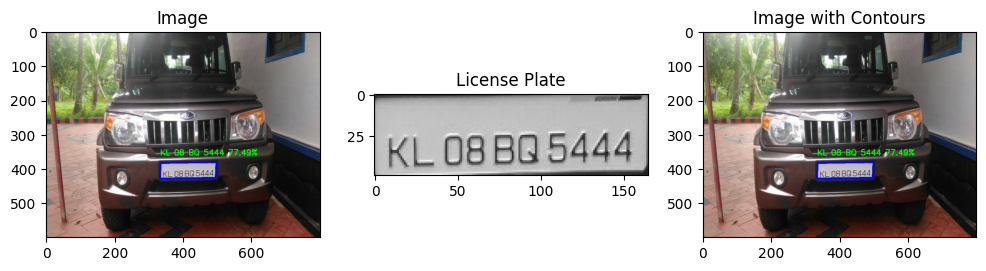

UP8OFQ0707 62.39%


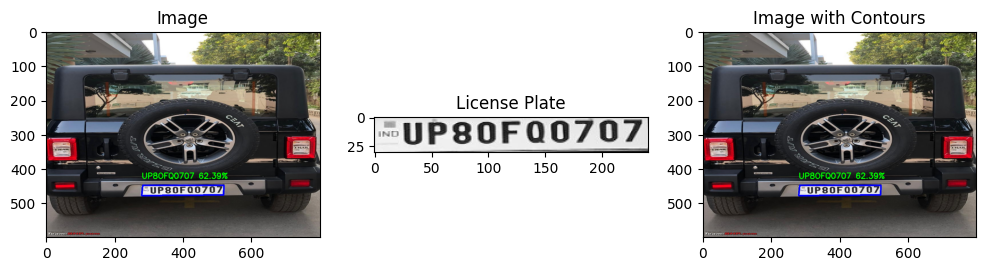

KLO7DC77771 66.62%


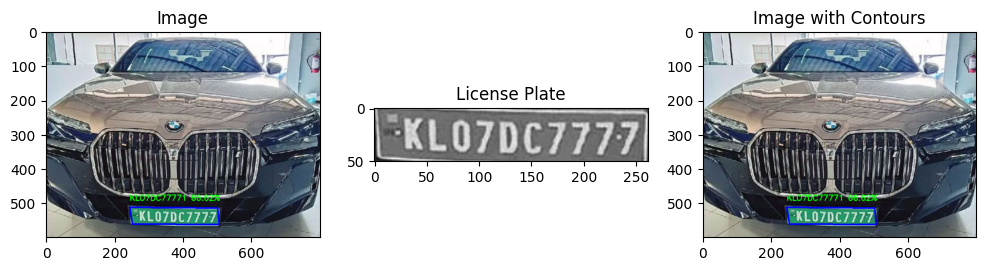

In [13]:
import os
import cv2
from easyocr import Reader
import matplotlib.pyplot as plt

# Specify the path to the folder containing images
image_folder = "/content/drive/MyDrive/car"

 # Replace with the correct folder path

# Initialize the OCR reader (assuming you are using EasyOCR)
reader = Reader(['en'], gpu=False, verbose=False)  # Change language as needed

# Function to process each image
def process_image(image_path):
    try:
        # Read the image using OpenCV
        car = cv2.imread(image_path)

        # Check if the image was read successfully
        if car is None:
            print(f"Failed to read image: {image_path}")
            return

        # Resize the image to 800x600 pixels
        car = cv2.resize(car, (800, 600))

        # Image processing for edge detection
        gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        edged = cv2.Canny(blur, 10, 200)

        # Identify the panel (license plate)
        contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
        plate_cnt = None
        for contour in contours:
            arc_length = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * arc_length, True)
            if len(approx) == 4:
                plate_cnt = approx
                break

        # Read text from the panel using OCR
        if plate_cnt is not None:
            (x, y, w, h) = cv2.boundingRect(plate_cnt)
            plate_roi = gray[y:y + h, x:x + w]

            detection = reader.readtext(plate_roi)

            if len(detection) == 0:
                text = "Impossible to read the text from the license plate"
                cv2.putText(car, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
            else:
                cv2.drawContours(car, [plate_cnt], -1, (255, 0, 0), 3)
                text = f"{detection[0][1]} {detection[0][2] * 100:.2f}%"
                cv2.putText(car, text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
                print(text)

        # Plotting the results using matplotlib
        plt.figure(figsize=(12, 6))

        # Display the original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(car, cv2.COLOR_BGR2RGB))
        plt.title("Image")

        # If the license plate is found, display a thumbnail of the plate
        if plate_cnt is not None:
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(plate_roi, cv2.COLOR_BGR2RGB))
            plt.title("License Plate")

            # Display the image with contours drawn around the license plate
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(car, cv2.COLOR_BGR2RGB))
            plt.title("Image with Contours")

        plt.show()

    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

# Loop through all files in the specified image folder
for filename in os.listdir(image_folder):
    # Check if the file has a JPG, JPEG, or PNG extension (case-insensitive)
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        # Construct the full file path
        image_path = os.path.join(image_folder, filename)

        # Process the image
        process_image(image_path)